![](files/images/EscUpmPolit_p.gif "UPM")

<header style="width: 100%; position: relative; text-align: center;">
  <div style="width: 80%; display: inline-block;">
    <h1 style="margin: 0; margin-bottom: 10px;">Procesado de datos de Blockchain</h1>
    <h3 style="margin: 0; margin-bottom: 20px;">TFM</h3>
    <h5 style="margin: 0;">Universidad Politécnica de Madrid. © Pablo Ruiz Giles</h5>
  </div>
</header>


<section id="comprar">
  <h1>Revender</h1>

</section>

A continuación se presenta un breve resumen de los puntos que se tratarán en el notebook:

- Revender: Esta sección se enfoca en el proceso de revender y analizar transacciones.

- Importar datasets: Se explica cómo importar los conjuntos de datos necesarios para el estudio, incluyendo los datasets paralelo y Etherscan.

- Procesamiento de los datos: En esta sección se describen los procesos aplicados a los datos, como la modificación de la columna de Coste en dólares, la adición de columnas relacionadas con el tiempo y el cálculo de los costes totales en dólares.

- Representación: Aquí se presentan diferentes formas de representación gráfica, incluyendo la representación del coste en dólares tanto en conjunto como individualizado, la representación del coste en dólares y el tiempo de cada transacción, la representación del gas y su equivalencia en coste en dólares, la representación de dispersión para comparar el gas utilizado y el coste en dólares por bloque tanto individualmente como en conjunto, y la representación mediante boxplot del gas utilizado y el coste en dólares.

- Resumen del conjunto de datos: Esta sección proporciona un resumen general del conjunto de datos.

- Importar dataset: Se explica cómo importar un dataset adicional.

- Procesamiento de los datos: En esta sección se describen los procesos aplicados a los datos, como la modificación de la columna de coste total y la adición de columnas relacionadas con el coste en dólares.

- Representación: Aquí se presentan diferentes formas de representación gráfica, incluyendo la representación del coste total y la representación del coste total y la duración.

<h1>Índice</h1>
	<ul>
		<li><h3>Revender</h3></li>
		<li>Importar datasets
			<ul>
				<li><a href="#paralelo">Paralelo</a></li>
				<li><a href="#etherscan">Etherscan</a></li>
			</ul>
		</li>
		<li>Procesamos los datos
			<ul>
				<li><a href="#modificacion-wei">Modificación de la columna Coste en dólares</a></li>
                <li><a href="#columnas-tiempo">Añadir columna Diferencia de tiempos, Duración y Coste Total</a></li>
				<li><a href="#conversion-hex-dec">Conversión de hexadecimal a decimal Gas utilizado</a></li>
                <li><a href="#columnas-dolares">Añadir columna Coste en dólares y Coste en dólares total</a></li>
			</ul>
		</li>
		<li>Representación
			<ul>
				<li><a href="#representacion-conjunto">Representación de Coste de dólares en Conjunto</a></li>
				<li><a href="#representacion-individual">Representación de Coste de dólares Individualizado</a></li>
				<li><a href="#representacion-tiempo">Representación de coste en dólares y tiempo que tarda en cada transacción</a></li>
				<li><a href="#representacion-gas">Representación del gas y su equivalencia en Coste en dólares</a></li>
				<li><a href="#dispersion-individual">Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque Individualizado</a></li>
				<li><a href="#dispersion-conjunto">Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque en Conjunto</a></li>
				<li><a href="#boxplot-gas">Representación mediante BoxPlot del Gas utilizado</a></li>
				<li><a href="#boxplot-coste">Representación mediante BoxPlot del Coste en dólares</a></li>
			</ul>
		</li>
		<li><h3>Resumen del conjunto de datos</h3></li>    
		<li>Importar dataset
			<ul>
				<li><a href="#resumen">Resumen</a></li>
			</ul>
		</li>
		<li>Procesamos los datos
			<ul>
				<li><a href="#modificacion-coste-total">Modificación de la columna Coste Total</a></li>
                <li><a href="#columnas-dolares2">Añadir columna Coste en dólares y Coste en dólares total</a></li>
			</ul>
		</li>
		<li>Representación
			<ul>
				<li><a href="#representacion-coste-total">Representación de Coste Total</a></li>
				<li><a href="#representacion-coste-duracion">Representación de Coste Total y la duración</a></li>
			</ul>
		</li>
	</ul>


## Importamos los datasets

<section id="paralelo">
  <h2>Paralelo Datasets</h2>

</section>

Importamos los datastes de datos y creamos un diccionario llamado datasets_resumen que contiene los datos anteriormente importados

In [1]:
import pandas as pd
import os

# Obtener la lista de carpetas en la carpeta datos/paralelo/
carpetas = [f for f in os.listdir('datos/paralelo/') if os.path.isdir(os.path.join('datos/paralelo/', f))]

# Crear un diccionario vacío para almacenar los DataFrames
datasets_resumen = {}

# Leer cada archivo CSV en cada carpeta y asignarlo a una variable con el nombre de la carpeta
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/paralelo/', carpeta)) if f.endswith('paralelodatos2.csv')]
    for f in csv_files:
        name = os.path.splitext(f)[0]
        name_without_suffix = name.replace('_paralelodatos2', '')
        vars()[name] = pd.read_csv(os.path.join('datos/paralelo/', carpeta, f))
        datasets_resumen[name_without_suffix] = eval(name)

# Imprimir los nombres de las variables creadas que contengan "_paralelodatos2"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_resumen.keys()):
    print(var)


Los siguientes DataFrames se han creado:
arbitrum
arbitrum_bear
avalanche
boba
celo
optimism_bear
polygon_bear
sepolia
sepolia_bear


<section id="etherscan">
  <h2>Etherscan Datasets</h2>

</section>

Importamos los datastes de ethercan y creamos un diccionario llamado datasets_scan que contiene los datos anteriormente importandos

In [2]:
import pandas as pd
import os

# Crear un diccionario vacío para almacenar los DataFrames
datasets_scan = {}

# Obtener los archivos CSV en todas las subcarpetas que contengan '_secuencial' en su nombre
csv_files = []
for root, dirs, files in os.walk('datos/scan/'):
    for f in files:
        if 'scan' in f and f.endswith('.csv'):
            csv_file_path = os.path.join(root, f)
            name = os.path.splitext(os.path.basename(csv_file_path))[0]
            df = pd.read_csv(csv_file_path)
            vars()[name] = df
            datasets_scan[name] = df

# Imprimir los nombres de los DataFrames creados
print("Los siguientes DataFrames se han creado:")
for var_name in sorted(datasets_scan.keys()):
    print(var_name)


Los siguientes DataFrames se han creado:
scan_arbitrum
scan_avalanche
scan_boba
scan_celo
scan_goerli
scan_optimism
scan_sepolia


#### Visualizamos el tipo de datos que contiene etherscan

In [3]:
# Imprimir los nombres de las variables creadas que contengan "scan"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_scan.keys()):
    if 'scan' in var:
        print(var)

        # Acceder a cada DataFrame y asignar el índice a la columna "index_col"
        datasets_scan[var]['index_col'] = datasets_scan[var].index
        datasets_scan[var].info()

Los siguientes DataFrames se han creado:
scan_arbitrum
<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0x60fefc9d415057be9422701b7b470afef223402020fdbcb9f642f5399294debf to 0xb98ba76b2aa7a6237947cf677e13d9a4f265c2d38b912dfca57d20c87b463101
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Txhash                 117 non-null    int64  
 1   Blockno                117 non-null    int64  
 2   UnixTimestamp          117 non-null    object 
 3   DateTime               117 non-null    object 
 4   From                   106 non-null    object 
 5   To                     11 non-null     object 
 6   ContractAddress        117 non-null    float64
 7   Value_IN(ETH)          117 non-null    int64  
 8   Value_OUT(ETH)         117 non-null    float64
 9   CurrentValue @ $0/Eth  117 non-null    float64
 10  TxnFee(ETH)            117 non-null    float64
 11  TxnFee(USD)            115 non-null 

In [4]:
scan_sepolia['CurrentValue @ $0/Eth']

0x2ba958925512bc001ad998db5d7323deb4009f536bd01685ac40f193382db6bf    0.004907
0xaf2d1770d56bbff3511de38d8d46563535771d0bacc368019b0f4cb0ced09329    0.004907
0xcea1652e870fdd411c4a032a4c6357f4436c4e20a53095795013db0c09a2b90d    0.004907
0x062a7eb4b937dedeaaf052b483aad1709f893ff08fb6fa846b7e2bbf402d9c9b    0.004907
0x6ef5523d2706e7fce4240f88c99e52d857002405225b154d08a6f32cf3033d28    0.004907
                                                                        ...   
0x2b2abe3fcd305ba146c2e9649e220d07fc8d072da0f73839c0450aefe9af5126    0.000164
0x0a35f6ef1a9d96b5ee256e347e68c2e56546393e020f9b7de15dc68e8de921e3    0.000224
0xe9bbf8f437e3ded657c5fa023330f4a4dadbb2774414ae0d1e072a5c74d1bf3b    0.000187
0x6ddaba4ab985fa88ad834535acdc18582032e823720587b78802da5874e30d23    0.067051
0x5c89f0a3c1ba1b723fcbd1953525b7c978e49888155d3228678f6c5f788d9b9c    0.000926
Name: CurrentValue @ $0/Eth, Length: 273, dtype: float64

In [5]:
scan_avalanche['CurrentValue @ $0/Eth']

0x24cd4afbf8c0f52567f806d859206d33c97c4b81b50ae00e21c76affcb63c630    0.000567
0xae9ef4c03408ab4742a86b69b73f8b9225b47d0bbf66a13e6d724abe1afd8e28    0.000557
0x7351c744c9f0d47d6e1945806201cb3eb7e60c297982104ba9275524ed0cf5bf    0.000567
0xbb2a1f3da4431525e4bee332f17119618b74280fdecdc2e2825f5939eb80a123    0.000567
0x13d420d5c6dea926ea7dae0d9c5510404284744de64542e3c739d66feab549e1    0.000567
                                                                        ...   
0x9c4e13cebac0173af1fb14d27d6ce745466874a663644cd5990530027ecc0914    0.001024
0x3ed97ca96389cd196b8686f0295abed76389f1ce44310018e1cff51b19fd68dd    0.001080
0xd2e1d4a6098c80dbe734efac34131416576c3f4f111303db37703cdb6b96600e    0.004295
0xd4b7da15eaacca89fc10d666ac04aa8554b1faf5748d46fd0bc7c910568ef8bb    0.078207
0x28d0e0d45fd15719a80219c07bc913f776edd7430cd58abe61276dab0f89f37e    0.001080
Name: CurrentValue @ $0/Eth, Length: 83, dtype: float64

# Procesamos los datos

<section id="modificacion-wei">
  <h2>Modificación de la columna Coste en dólares</h2>

</section>

Creamos una lista llamada formatted_transactions que contiene los hashes de las operaciones que hemos realizado. Estos hashes se obtienen de los datasets de datos que se encuentran dentro de datasets_resumen

In [6]:
# Crear una lista con todas las transacciones formateadas como cadenas
formatted_transactions = []
for dataset in datasets_resumen.values():
    transacciones = [valor for valor in dataset['Transacción']]
    formatted_transactions += [str(valor)[:-1] for valor in transacciones]


In [7]:
len(formatted_transactions)

108

Creamos un nuevo dataframe llamado df que contiene los hashes de las transacciones que coinciden con las de formatted_transactions y guardamos el valor de CurrentValue @ $0/Eth que indica el coste de la transacción. A su vez también se crea una nueva columna llamada index_col que guarda la dirección del hash

In [8]:
import pandas as pd

# Crear un DataFrame vacío para almacenar los DataFrames filtrados concatenados
df = pd.DataFrame()

# Iterar sobre las direcciones
for direccion in formatted_transactions:
    # Buscar en los datasets que empiezan con 'scan_' y contienen la dirección actual
    dataframes_direccion = [datasets_scan[k][datasets_scan[k]['index_col'] == direccion][['index_col', 'CurrentValue @ $0/Eth']] for k in datasets_scan.keys() if k.startswith('scan_')]

    # Concatenar los DataFrames filtrados en un solo DataFrame
    df = pd.concat([df] + dataframes_direccion)

# Imprimir información sobre el DataFrame concatenado resultante
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0xd1879d4bb8a0fe991a697a76ea44c02fd750a3d779bd1a4a7e6b3c405fcd6b0c to 0x3dc7f27b9af524d81d38e525192be00c7fd46756ee402c01d4bcb72667eef996
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index_col              60 non-null     object 
 1   CurrentValue @ $0/Eth  60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB
None


Vemos la longitud del dataframe df. En este caso deberia de ser 12 * el numero de etherscan que se hayan cargado

In [9]:
# Imprimir la longitud del DataFrame
print(len(df))



60


A continuación, vemos que valores de la columna index_col de df coinciden con la columna Transacción de los datasets de datos. Los que coincidan se sustituirá el valor de Coste en dólares por el de CurrentValue @ $0/Eth que es el correcto

In [10]:
# Iterar sobre los DataFrames en el diccionario `datasets_resumen`
for k, df_resumen in datasets_resumen.items():
    # Iterar sobre las transacciones en el DataFrame `df`
    for index, row in df.iterrows():
        # Obtener la dirección de la transacción actual
        direccion = row['index_col']
        # Añadimos : para que sea igual a las transacciones de los datos
        direccion = row['index_col'] + ":"

        # Obtener el valor de la transacción actual
        valor = row['CurrentValue @ $0/Eth']
        # Buscar si la dirección de la transacción actual coincide con la columna "Transacción" del DataFrame del diccionario `datasets_resumen`
        mask = df_resumen['Transacción'] == direccion
        # Si hay una coincidencia, establecer el valor de "Coste en wei" en el valor de la transacción actual
        if mask.any():
            df_resumen.loc[mask, 'Coste en wei'] = valor

<section id="columnas-tiempo">
  <h2>Añadir columna Diferencia de tiempos, Duración y Coste Total</h2>

</section>

#### Crear una lista con los nombres de los datasets

In [11]:
import os

# Obtener la lista de carpetas en la carpeta datos/secuencial/
carpetas = [f for f in os.listdir('datos/paralelo/') if os.path.isdir(os.path.join('datos/paralelo/', f))]

# Crear una lista para almacenar los nombres de los datasets
datasets = []

# Leer cada archivo CSV en cada carpeta y agregarlo a la lista datasets si termina en "_datos.csv"
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/paralelo/', carpeta)) if f.endswith('_paralelodatos2.csv')]
    for f in csv_files:
        datasets.append(os.path.splitext(f)[0])

# Imprimir los nombres de los datasets creados
print("Los siguientes datasets se han creado:")
for dataset in datasets:
    print(dataset)


Los siguientes datasets se han creado:
sepolia_bear_paralelodatos2
sepolia_paralelodatos2
polygon_bear_paralelodatos2
celo_paralelodatos2
optimism_bear_paralelodatos2
boba_paralelodatos2
arbitrum_bear_paralelodatos2
avalanche_paralelodatos2
arbitrum_paralelodatos2


### Diferencia de tiempos, Duración y Coste Total

Diferencia de tiempos: Es el tiempo que ha tardado en procesarse una transacción

Duración: Es la suma de las transacciones anteriores para ver como va aumentando el tiempo con la suma de transacciones

Coste total: Es la suma de las transacciones anteriores para ver como va aumentando el ether con la suma de transacciones

In [12]:


# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Convertir la columna "Tiempo" a tipo datetime
    globals()[dataset]["Tiempo"] = pd.to_datetime(globals()[dataset]["Tiempo"])

    # Calcular la diferencia de tiempo entre cada fila y la anterior, en segundos
    globals()[dataset]["Diferencia de tiempo"] = (globals()[dataset]["Tiempo"] - globals()[dataset]["Tiempo"].shift(1)).dt.total_seconds()

    # Inicializar el primer valor de la columna "Duración" con el valor de la primera fila de la columna "Diferencia de tiempo"
    globals()[dataset].loc[0, "Duración"] = globals()[dataset].loc[0, "Diferencia de tiempo"]

    # Sumar el primer valor de la columna "Duración" al resto de los valores en la columna "Duración"
    globals()[dataset]["Duración"] = globals()[dataset]["Duración"] + globals()[dataset].loc[0, "Duración"]

    # Sumar la columna "Diferencia de tiempo" al resto de los valores en la columna "Duración"
    globals()[dataset]["Duración"] = globals()[dataset]["Diferencia de tiempo"].cumsum().fillna(method='ffill')

    # Calcular la media de la columna "Diferencia de tiempo"
    media_diferencia_tiempo = globals()[dataset]["Diferencia de tiempo"].mean()

    # Reemplazar los valores NaN con la media de las otras filas
    globals()[dataset]["Diferencia de tiempo"].fillna(media_diferencia_tiempo, inplace=True)
    # Reemplazar los valores NaN con la media de las otras filas
    globals()[dataset]["Duración"].fillna(globals()[dataset]["Diferencia de tiempo"][0], inplace=True)
    
    # Crear una columna llamada "Coste total" que sea la suma de la columna "Coste en wei"
    globals()[dataset]["Coste total"] = globals()[dataset]["Coste en wei"].cumsum()


# Iterar sobre la lista de nombres de datasets, pero saltarse la primera iteración
for dataset in datasets:
    globals()[dataset]["Duración"] =  globals()[dataset]["Duración"] +  globals()[dataset]["Duración"][0]

# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Modificar el valor de Duración de la primera fila en el DataFrame original
    globals()[dataset].loc[0, "Duración"] = globals()[dataset]["Diferencia de tiempo"][0]    



<section id="conversion-hex-dec">
  <h2>Conversión de hexadecimal a decimal Gas utilizado</h2>

</section>


Hacemos una conversión de hexadecimal a decimal de la columna de Gas Utilizado

In [13]:
#Gas utilizado 
import pandas as pd

def hex_to_dec(datos):
    # Convierte la columna "Gas utilizado" de hexadecimal a decimal
    datos["Gas utilizado"] = datos["Gas utilizado"].apply(lambda x: int(x, 16))
    
    # Devuelve el DataFrame modificado
    return datos


# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Aplicar la función a la columna "Gas utilizado" del DataFrame
    globals()[dataset] = hex_to_dec(globals()[dataset])
    
    # Imprimir el DataFrame resultante
    print(globals()[dataset].head())


                                         Transacción  Estado  Gas utilizado  \
0  0x1928324fcb4ff249288da3a98972993df8c820e2c96f...    True          29265   
1  0x522a731a9e5a2ab72ae5d506f4b53e7dff138d668be9...    True          29253   
2  0xa26c11d5c1c2a0ffa5c2058ae964733ff39b95494b81...    True          29265   
3  0xf1b0a3d7158080922aa799c8c4f74a6f6e12e797765c...    True          29265   
4  0x99655dd4fb85f195de33166f38af71b2b8ea96545d1b...    True          29265   

   Coste en wei   Bloque              Tiempo  Diferencia de tiempo  Duración  \
0      0.000029  3318762 2023-05-12 12:34:56                   1.0       1.0   
1      0.000029  3318763 2023-05-12 12:34:57                   1.0       2.0   
2      0.000029  3318764 2023-05-12 12:34:58                   1.0       3.0   
3      0.000029  3318765 2023-05-12 12:34:59                   1.0       4.0   
4      0.000029  3318766 2023-05-12 12:35:00                   1.0       5.0   

   Coste total  
0     0.000029  
1     0.00



<section id="columnas-dolares">
  <h2>Añadir columna Coste en dólares y Coste en dólares total</h2>

</section>

Llevamos a cabo una conversión del precio del ether de cada criptomoneda a su equivalente en dólares estadounidenses en el instante en el que se recolectaron los datos

In [14]:
import pandas as pd

# Definir las constantes de conversión de cada conjunto de datos
conversion_constants = {
    "ether": 1904,
    "celo": 0.95,
    "avax": 22
}

# Definir la función para convertir a dólares
def wei_to_usd(datos, constant):
    # Agregar la nueva columna "Coste en dólares"
    datos["Coste en dólares"] = datos["Coste en wei"] * constant
    datos["Coste en dólares total"] = datos["Coste total"] * constant
    
    # Devolver el DataFrame modificado
    return datos

# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Obtener la constante correspondiente al conjunto de datos actual
    if "celo" in dataset:
        constant = conversion_constants['celo']
    elif "avalanche" in dataset:
        constant = conversion_constants['avax']
    else:
        constant = conversion_constants['ether']
    
    # Aplicar la función de conversión a dólares a la columna "Coste en wei"
    globals()[dataset] = wei_to_usd(globals()[dataset], constant)
    
    # Imprimir el DataFrame resultante
    print(globals()[dataset].head())


                                         Transacción  Estado  Gas utilizado  \
0  0x1928324fcb4ff249288da3a98972993df8c820e2c96f...    True          29265   
1  0x522a731a9e5a2ab72ae5d506f4b53e7dff138d668be9...    True          29253   
2  0xa26c11d5c1c2a0ffa5c2058ae964733ff39b95494b81...    True          29265   
3  0xf1b0a3d7158080922aa799c8c4f74a6f6e12e797765c...    True          29265   
4  0x99655dd4fb85f195de33166f38af71b2b8ea96545d1b...    True          29265   

   Coste en wei   Bloque              Tiempo  Diferencia de tiempo  Duración  \
0      0.000029  3318762 2023-05-12 12:34:56                   1.0       1.0   
1      0.000029  3318763 2023-05-12 12:34:57                   1.0       2.0   
2      0.000029  3318764 2023-05-12 12:34:58                   1.0       3.0   
3      0.000029  3318765 2023-05-12 12:34:59                   1.0       4.0   
4      0.000029  3318766 2023-05-12 12:35:00                   1.0       5.0   

   Coste total  Coste en dólares  Coste en d

In [15]:
sepolia_paralelodatos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transacción             12 non-null     object        
 1   Estado                  12 non-null     bool          
 2   Gas utilizado           12 non-null     int64         
 3   Coste en wei            12 non-null     float64       
 4   Bloque                  12 non-null     int64         
 5   Tiempo                  12 non-null     datetime64[ns]
 6   Diferencia de tiempo    12 non-null     float64       
 7   Duración                12 non-null     float64       
 8   Coste total             12 non-null     float64       
 9   Coste en dólares        12 non-null     float64       
 10  Coste en dólares total  12 non-null     float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 1.1+ KB


# Representación

Observamos que todos los datos presentan la misma cantidad de elementos, lo que nos permite garantizar que las comparaciones efectuadas sean precisas y correctas.

In [16]:
for key, dataset_values in datasets_resumen.items():
    print(f"Longitud de la columna 'Coste en dólares' en el DataFrame {key}: {len(dataset_values['Coste en dólares'])}")

Longitud de la columna 'Coste en dólares' en el DataFrame sepolia_bear: 12
Longitud de la columna 'Coste en dólares' en el DataFrame sepolia: 12
Longitud de la columna 'Coste en dólares' en el DataFrame polygon_bear: 12
Longitud de la columna 'Coste en dólares' en el DataFrame celo: 12
Longitud de la columna 'Coste en dólares' en el DataFrame optimism_bear: 12
Longitud de la columna 'Coste en dólares' en el DataFrame boba: 12
Longitud de la columna 'Coste en dólares' en el DataFrame arbitrum_bear: 12
Longitud de la columna 'Coste en dólares' en el DataFrame avalanche: 12
Longitud de la columna 'Coste en dólares' en el DataFrame arbitrum: 12



<section id="representacion-conjunto">
  <h2>Representación de Coste de dólares en Conjunto</h2>

</section>

Se representa en conjunto cual ha sido su coste en ether y como ha ido subiendo o bajando con el tiempo dependiendo de que función se estaba ejecutando o en que momento.

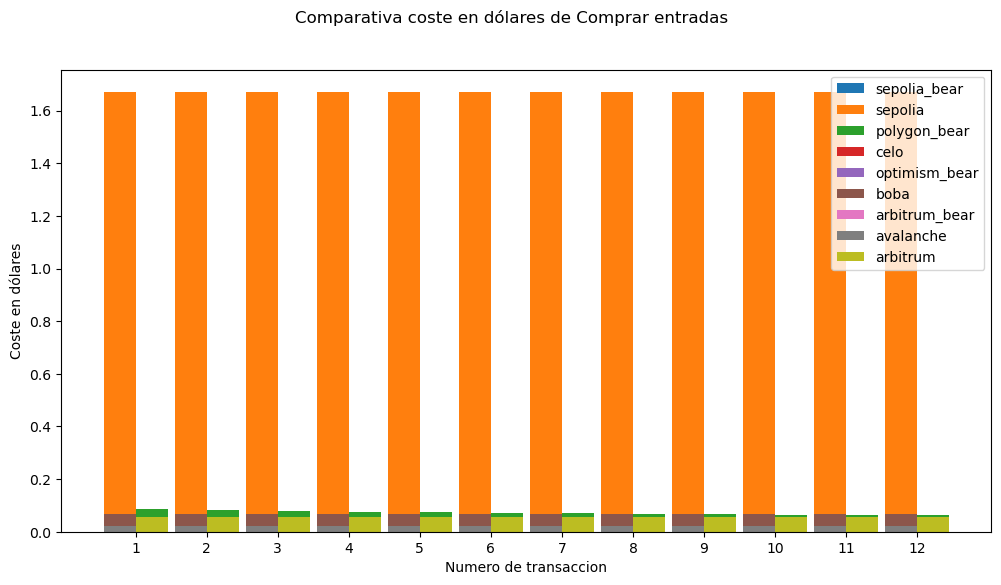

In [17]:
import matplotlib.pyplot as plt
import numpy as np

max_len = max([len(dataset_values['Coste en dólares']) for dataset_values in datasets_resumen.values()])
labels = [f"{i}" for i in range(1, max_len+1)]
x = np.arange(len(labels))
width = 0.45

# Crear el gráfico con figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre el diccionario de datasets y agregar los datos al gráfico
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    dataset_len = len(dataset_values['Coste en dólares'])
    ax.bar(x[:dataset_len] + ((-1)**i) * width/2, dataset_values['Coste en dólares'], width, label=f'{dataset_name}')

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Coste en dólares')
ax.set_xlabel('Numero de transaccion')
ax.set_xticks(x)
ax.set_xticklabels(labels[:max_len])
ax.legend()
fig.suptitle("Comparativa coste en dólares de Comprar entradas")

# Mostrar el gráfico
plt.show()



<section id="representacion-individual">
  <h2>Representación de Coste de dólares Individualizado</h2>

</section>

Vamos a observar de forma individualizada cual ha sido su coste en ether y como ha ido subiendo o bajando con el tiempo dependiendo de que función se estaba ejecutando o en que momento.

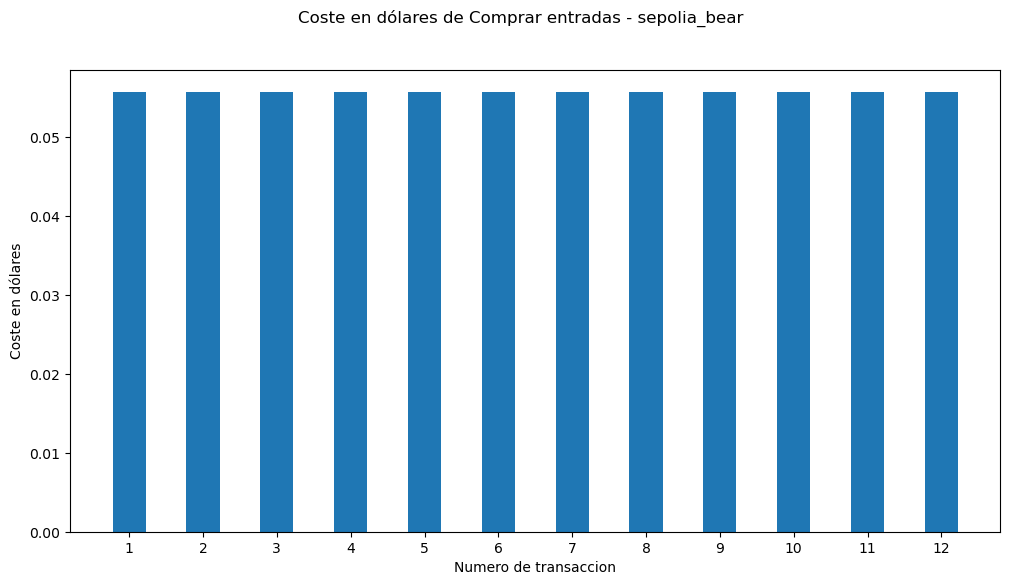

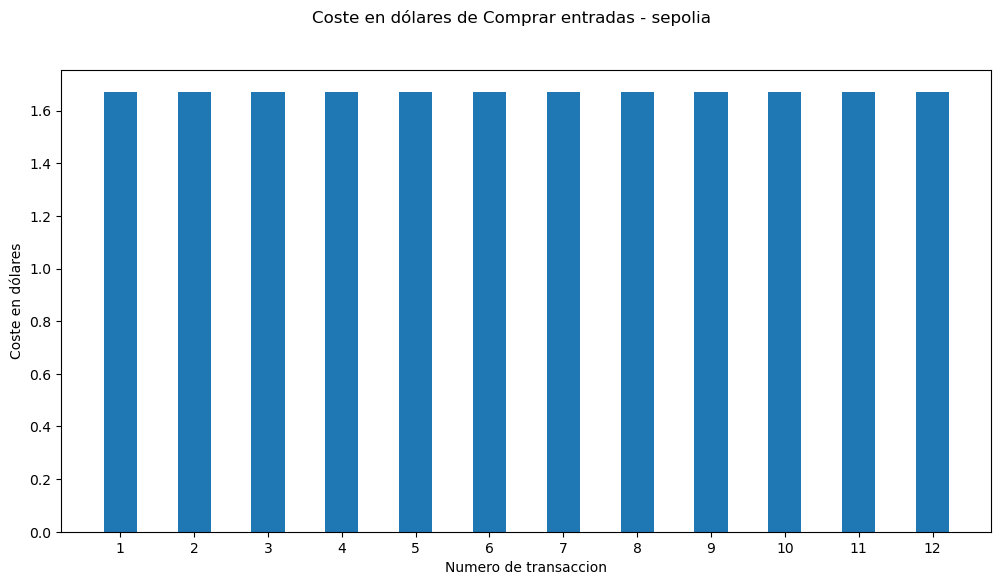

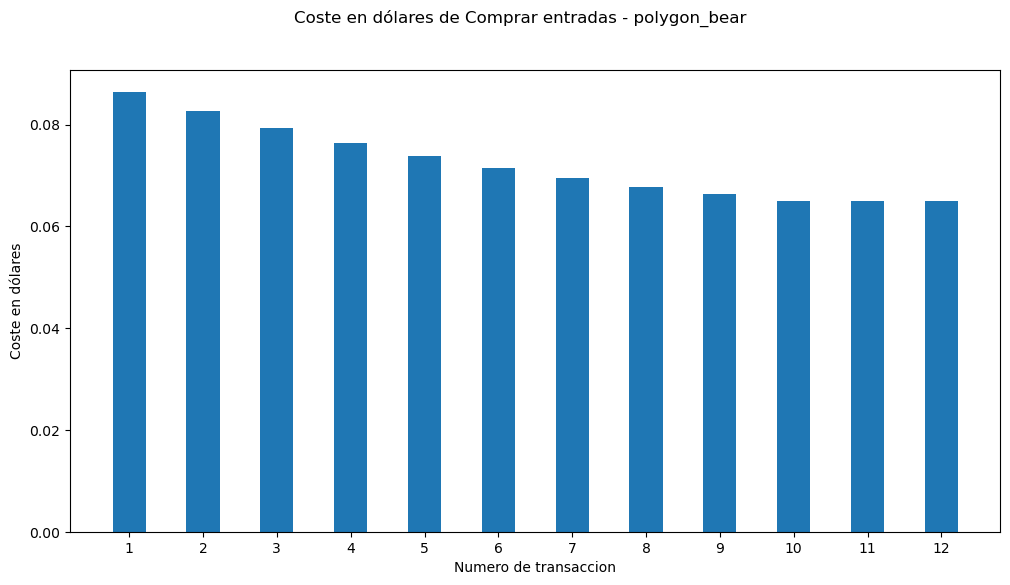

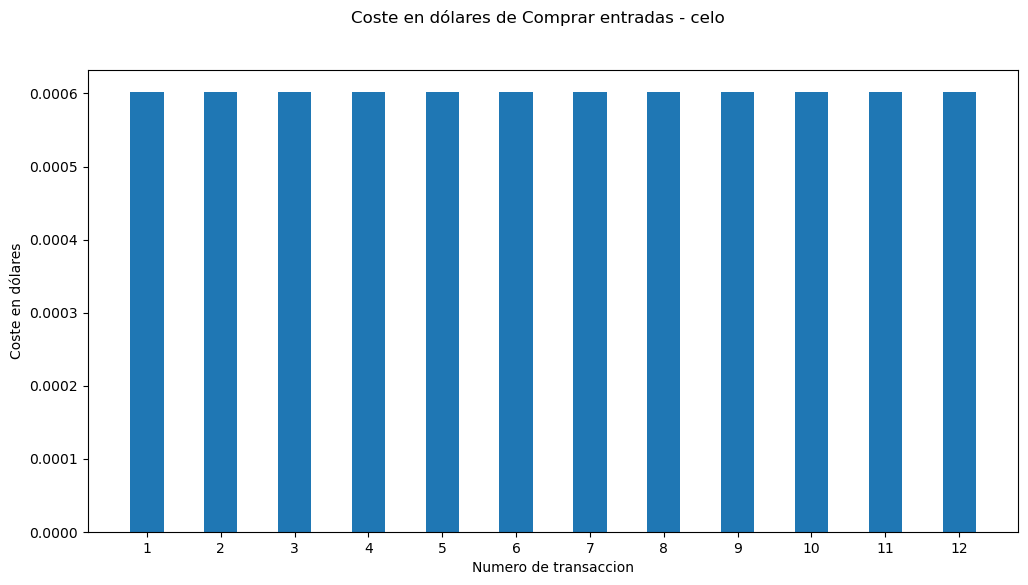

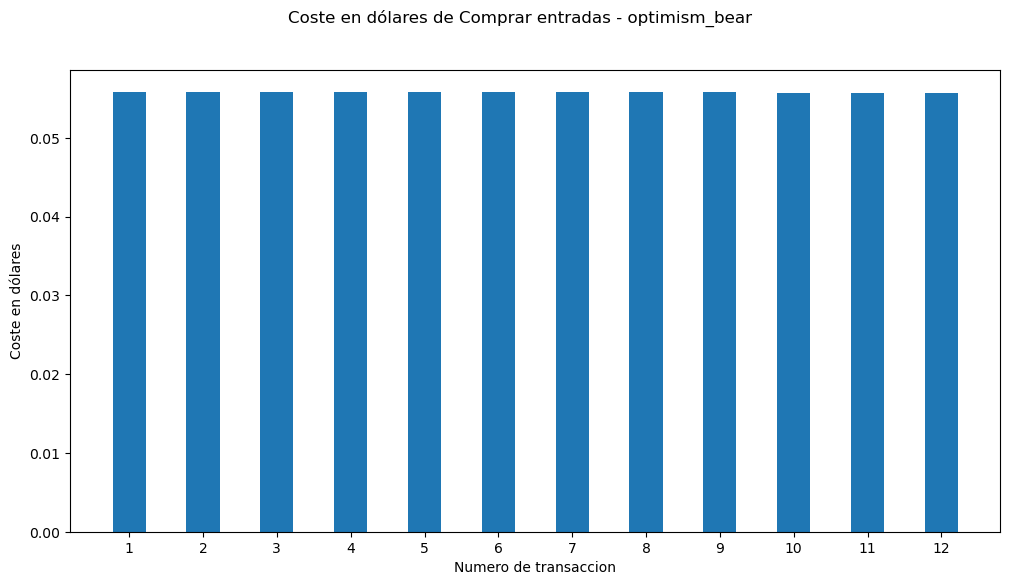

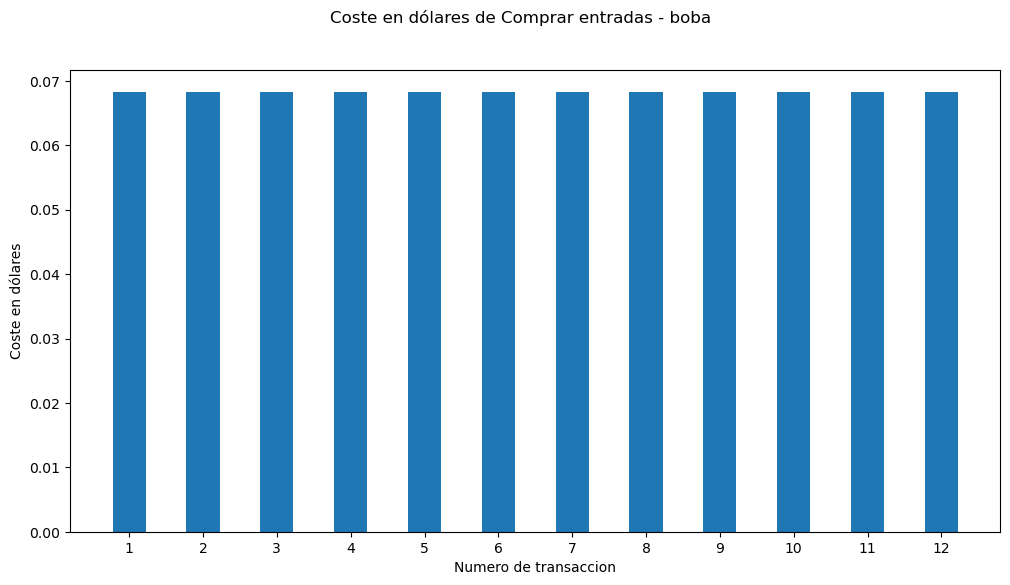

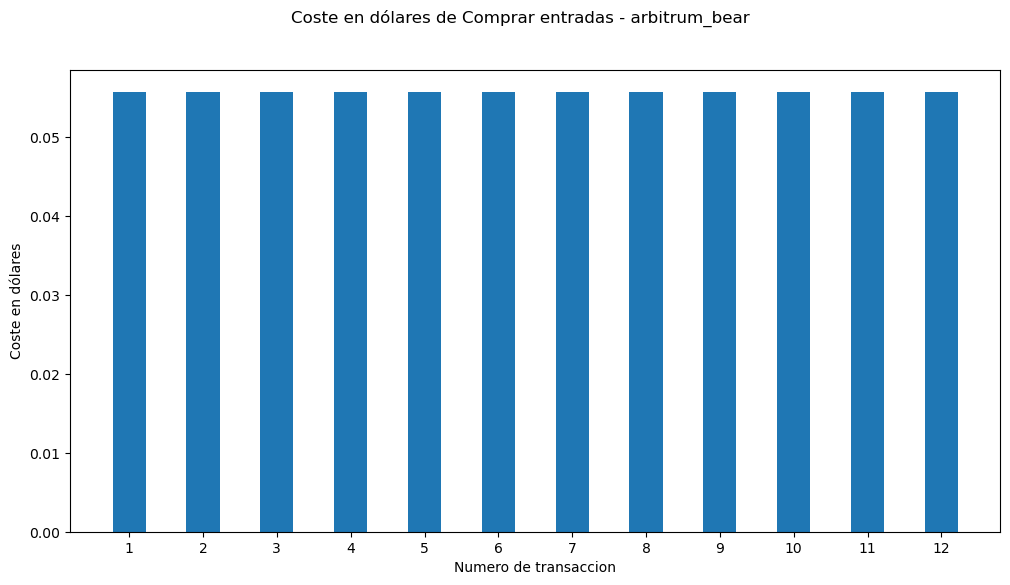

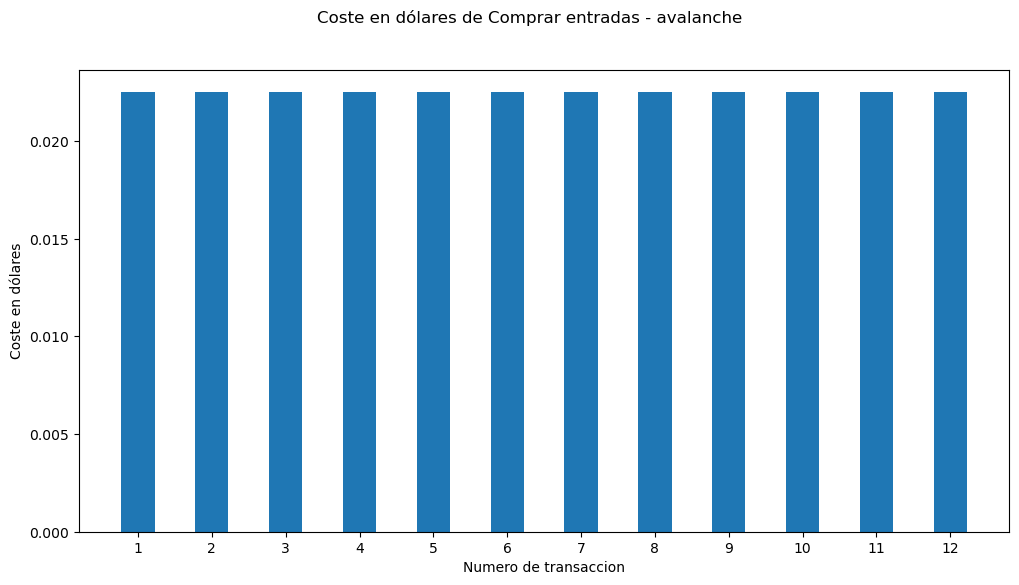

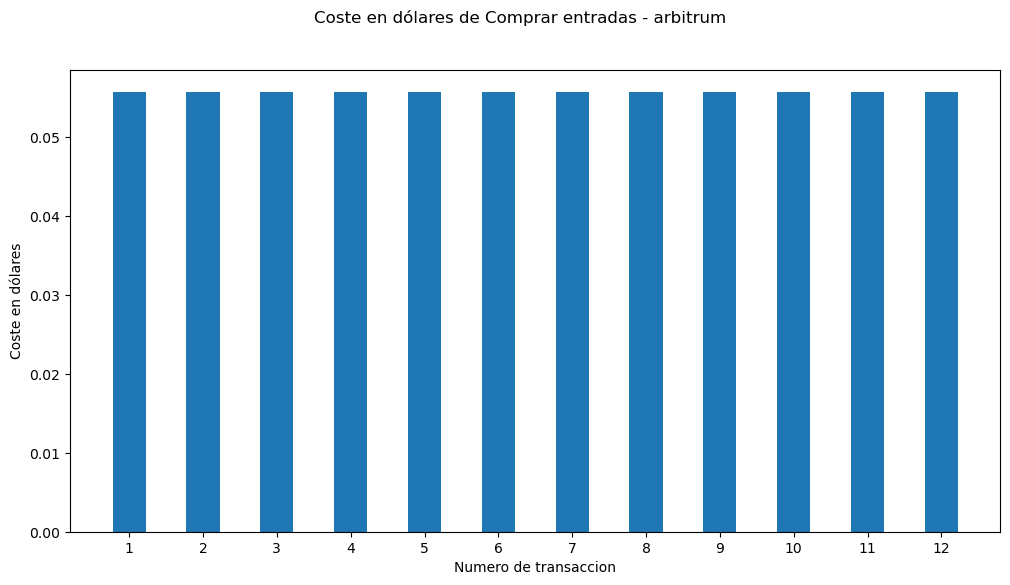

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparativa_compra(dataset_name, dataset):
    # Configuración del gráfico
    labels = [f"{i}" for i in range(1, len(dataset['Coste en dólares'])+1)]
    x = np.arange(len(labels))
    width = 0.45

    # Crear el gráfico con figsize
    fig, ax = plt.subplots(figsize=(12, 6))

    # Agregar los datos al gráfico
    ax.bar(x, dataset['Coste en dólares'], width)

    # Configurar las etiquetas y leyendas del gráfico
    ax.set_ylabel('Coste en dólares')
    ax.set_xlabel('Numero de transaccion')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    fig.suptitle(f"Coste en dólares de Comprar entradas - {dataset_name}")

    # Mostrar el gráfico
    plt.show()

# Generar la gráfica para cada dataset
for dataset_name, dataset_values in datasets_resumen.items():
    plot_comparativa_compra(dataset_name, dataset_values)


<section id="representacion-tiempo">
  <h2>Representación de coste en dólares y tiempo que tarda en cada transacción</h2>

</section>

Se va a observar el tiempo que tarda cada transacción de forma individual en completarse y el coste que ha tendo dicha transacción.

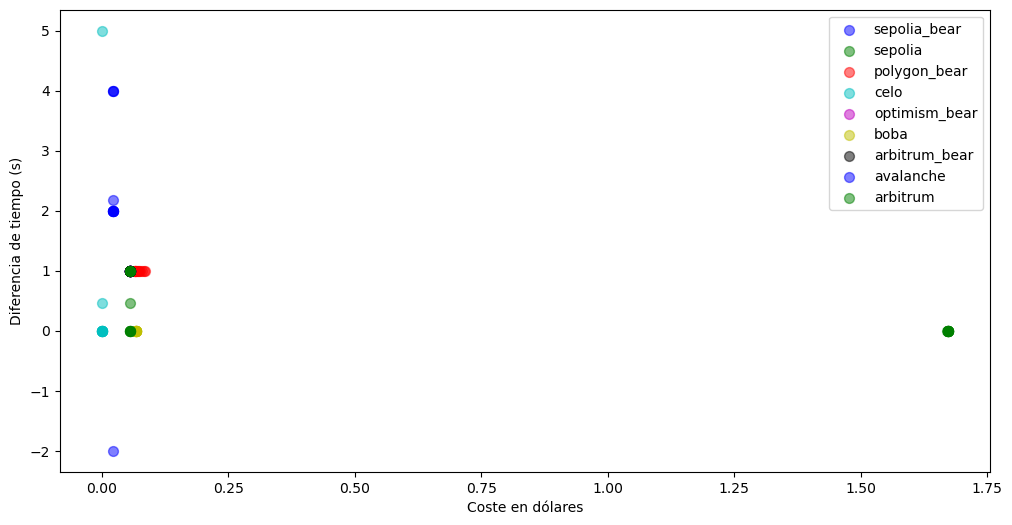

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico
size = 50
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
max_len = max([len(dataset_values['Coste en dólares']) for dataset_values in datasets_resumen.values()])
for dataset_values in datasets_resumen.values():
    dataset_values['Coste en dólares'] = np.pad(dataset_values['Coste en dólares'], (0, max_len - len(dataset_values['Coste en dólares'])), mode='constant')
labels = [f"{i}" for i in range(1, max_len+1)]
x = np.arange(len(labels))
width = 0.45

# Crear el gráfico con figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre el diccionario de datasets y agregar los datos al gráfico de dispersión
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    ax.scatter(dataset_values['Coste en dólares'], dataset_values['Diferencia de tiempo'], s=size, c=colors[i%len(colors)], alpha=0.5, label=f'{dataset_name}')
    
    # Agregar el número de puntos en cada posición
    points_dict = {}
    for j in range(len(dataset_values['Coste en dólares'])):
        point = (dataset_values['Coste en dólares'][j], dataset_values['Diferencia de tiempo'][j])
        if point in points_dict:
            points_dict[point] += 1
        else:
            points_dict[point] = 1
    for point, count in points_dict.items():
        if count > 1:
            ax.annotate(f"{count}", xy=point, xytext=(10, 10), textcoords='offset points', fontsize=8, color='white')

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Coste en dólares')
ax.set_ylabel('Diferencia de tiempo (s)')
ax.legend()

# Mostrar el gráfico
plt.show()


Vemos de forma numérica la cantidad de transaccione que han coincidido en coste y tiempo para poder hacernos una idea del tiempo que tardaría y el coste que supondría cada transacción de media

In [20]:
# Agregar columna 'Fuente' a cada DataFrame
for dataset_name, dataset_values in datasets_resumen.items():
    dataset_values['Fuente'] = dataset_name


In [21]:
# Crear una lista vacía para almacenar los DataFrames
dataframes = []

# Recorrer el diccionario y agregar cada DataFrame a la lista
for dataset_name, dataset_values in datasets_resumen.items():
    dataset_values['Fuente'] = dataset_name
    dataframes.append(dataset_values)

# Concatenar los DataFrames en la lista
datos = pd.concat(dataframes, axis=0, ignore_index=True)

# Contar el número de puntos con las mismas coordenadas y fuente
conteo = datos.groupby(['Diferencia de tiempo', 'Coste en dólares', 'Fuente']).size().reset_index(name='coincidencia')

# Ordenar los resultados por la columna 'coincidencia' de mayor a menor
conteo = conteo.sort_values(by=['coincidencia'], ascending=False)

# Crear una columna que indique la fuente de cada punto
for dataset_name in datasets_resumen:
    conteo['Fuente'] = conteo['Fuente'].apply(lambda x: dataset_name if x == dataset_name else x)

# Mostrar los resultados
display(conteo)


,Diferencia de tiempo,Coste en dólares,Fuente,coincidencia
14,1.000000,0.055721,sepolia_bear,11
6,0.000000,0.068316,boba,11
8,0.000000,1.671617,sepolia,11
2,0.000000,0.000602,celo,9
44,2.000000,0.022534,avalanche,6
4,0.000000,0.055721,arbitrum,5
13,1.000000,0.055721,arbitrum,5
23,1.000000,0.055765,optimism_bear,3
46,4.000000,0.022534,avalanche,3
15,1.000000,0.055725,arbitrum_bear,3



<section id="representacion-gas">
  <h2>Representación del gas y su equivalencia en Coste en dólares</h2>

</section>

Se observa en esta ocasión el gas que se ha necesitado para procesar cada transacción y su traducción a ether

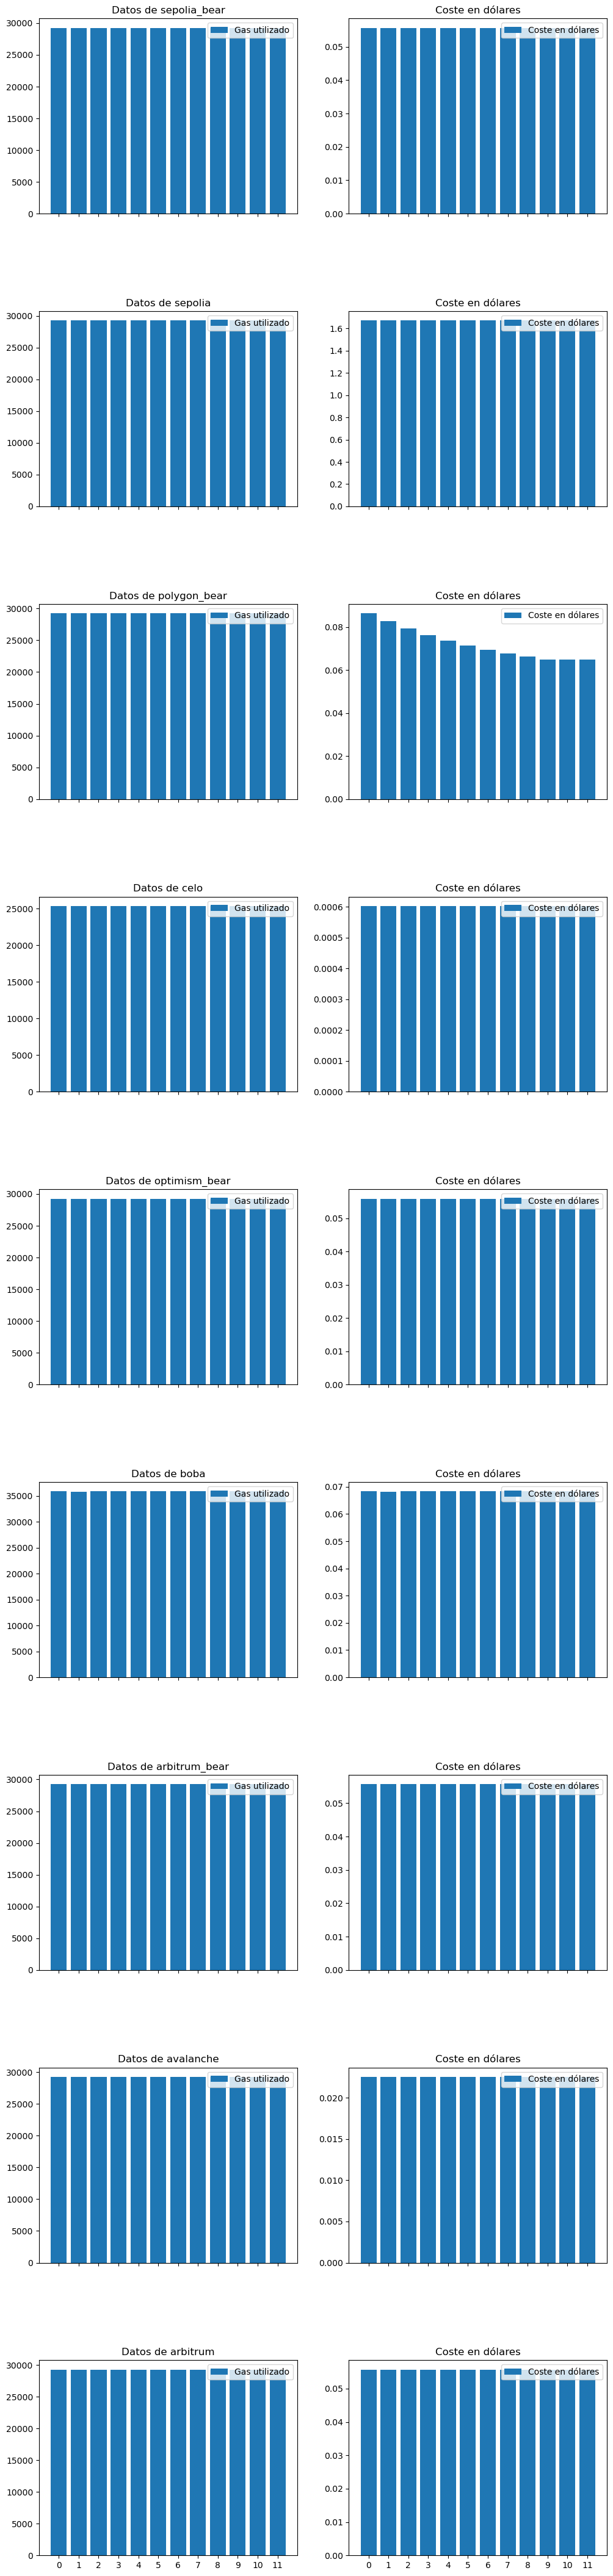

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
fig, axs = plt.subplots(len(datasets_resumen), 2, figsize=(12, 6*len(datasets_resumen)), sharex=True)
fig.subplots_adjust(hspace=0.5)

# Crear el gráfico de barras para cada conjunto de datos en datasets_resumen
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    axs[i, 0].bar(dataset_values.index, dataset_values["Gas utilizado"], label="Gas utilizado")
    axs[i, 0].legend()
    axs[i, 0].set_title("Gas utilizado")

    axs[i, 1].bar(dataset_values.index, dataset_values["Coste en dólares"], label="Coste en dólares")
    axs[i, 1].legend()
    axs[i, 1].set_title("Coste en dólares")
    axs[i, 1].set_xticks(dataset_values.index)
    axs[i, 1].set_xticklabels(dataset_values.index)

    # Añadir título a cada conjunto de gráficas
    axs[i, 0].set_title(f"Datos de {dataset_name}")

# Mostrar el gráfico
plt.show()


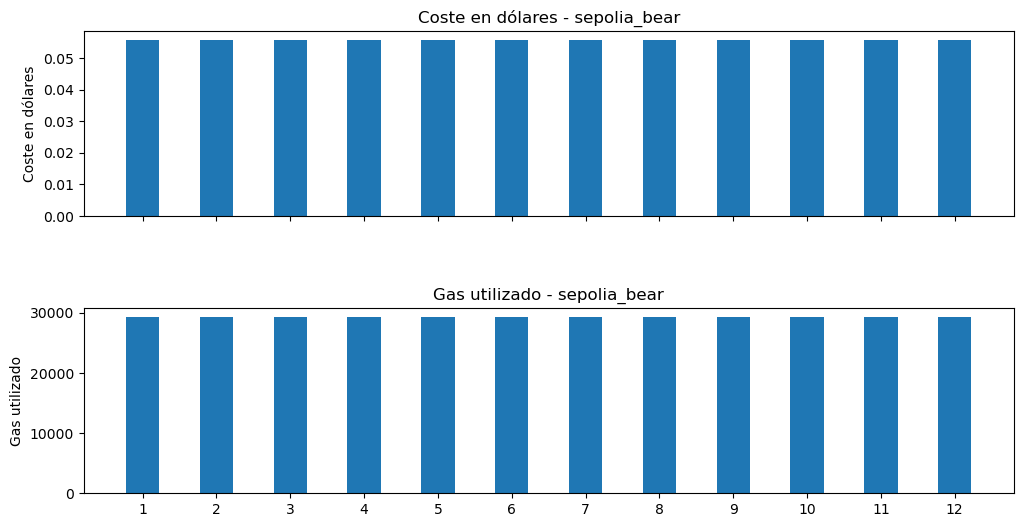

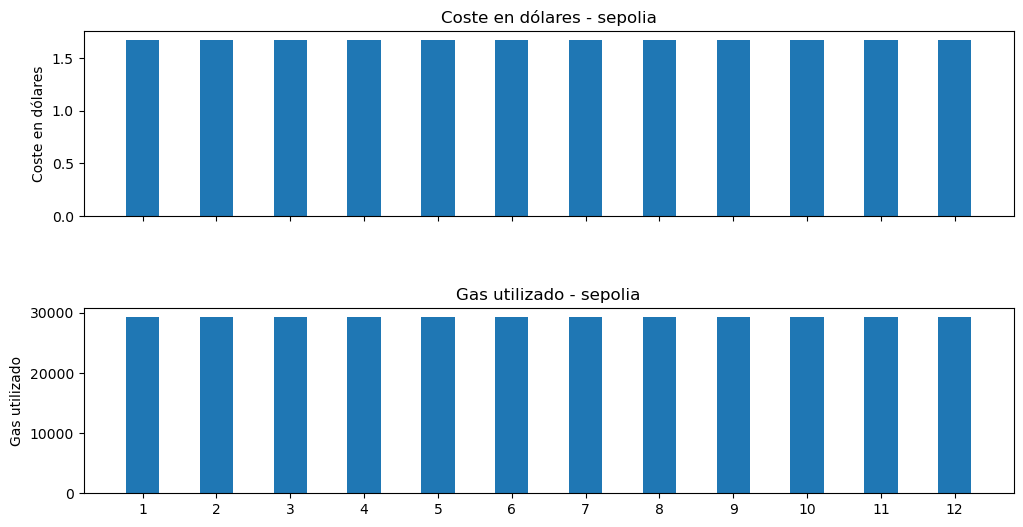

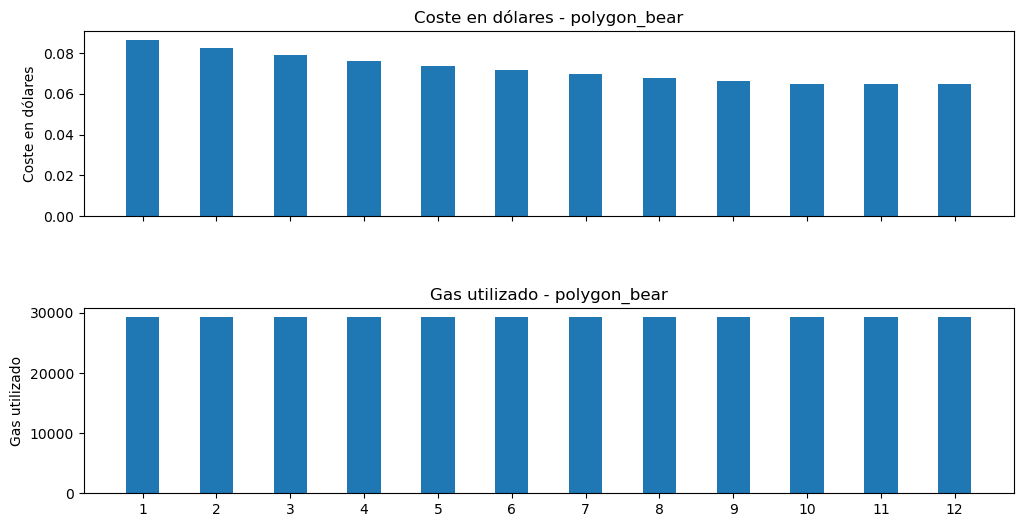

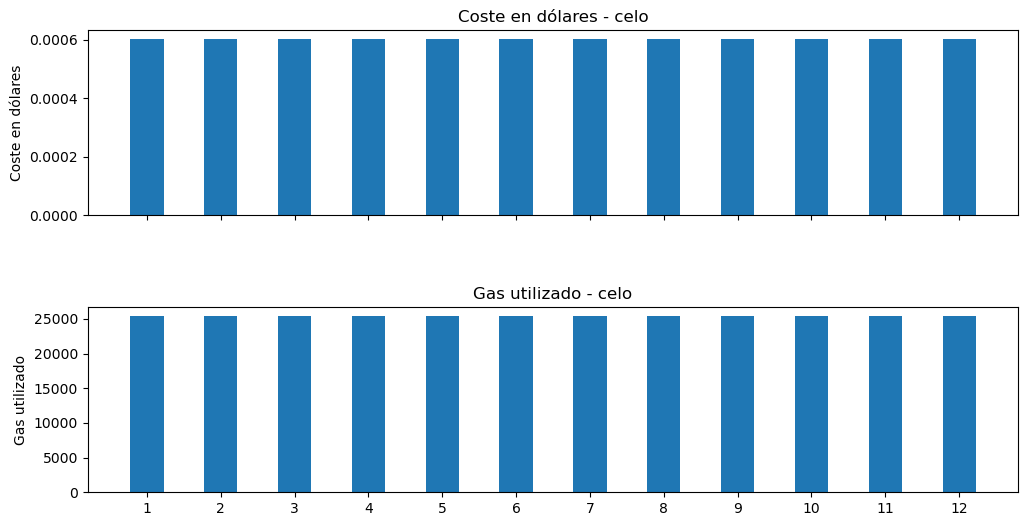

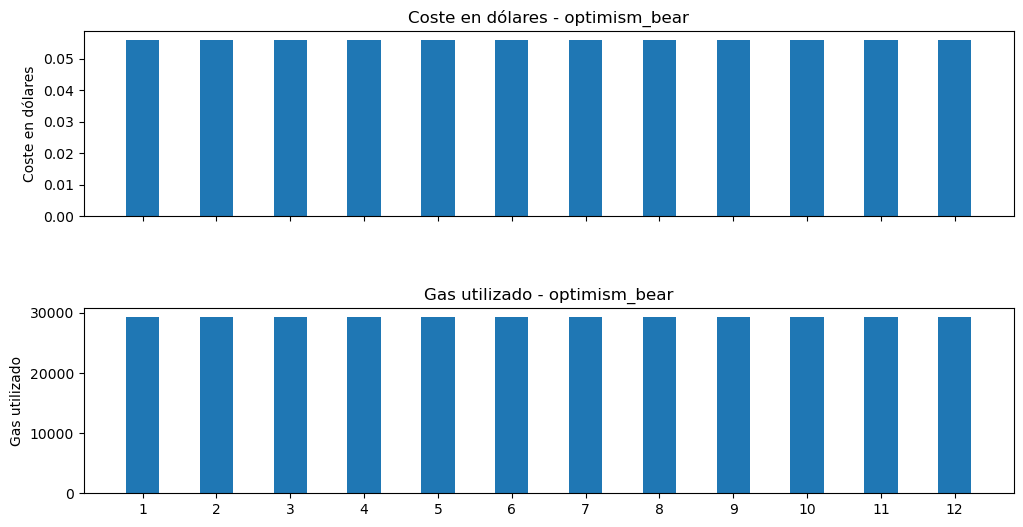

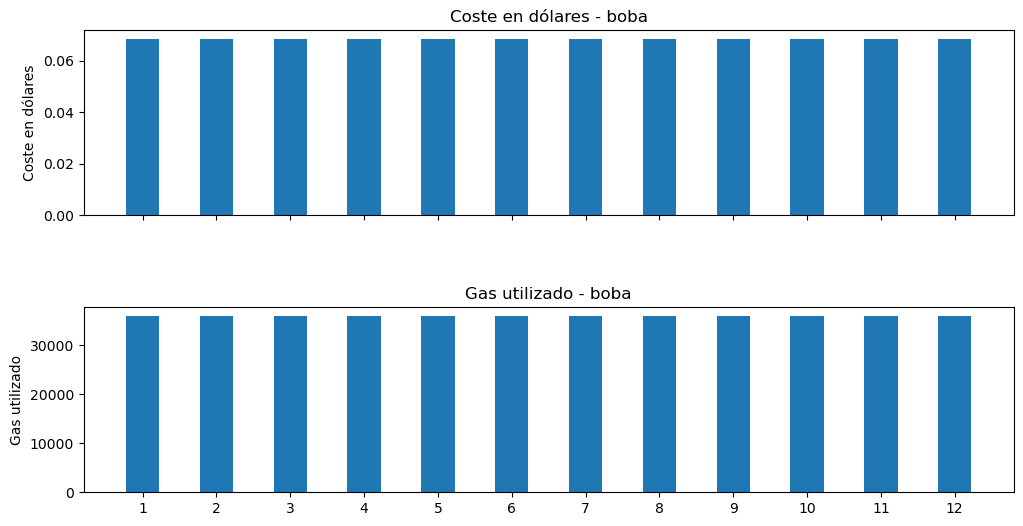

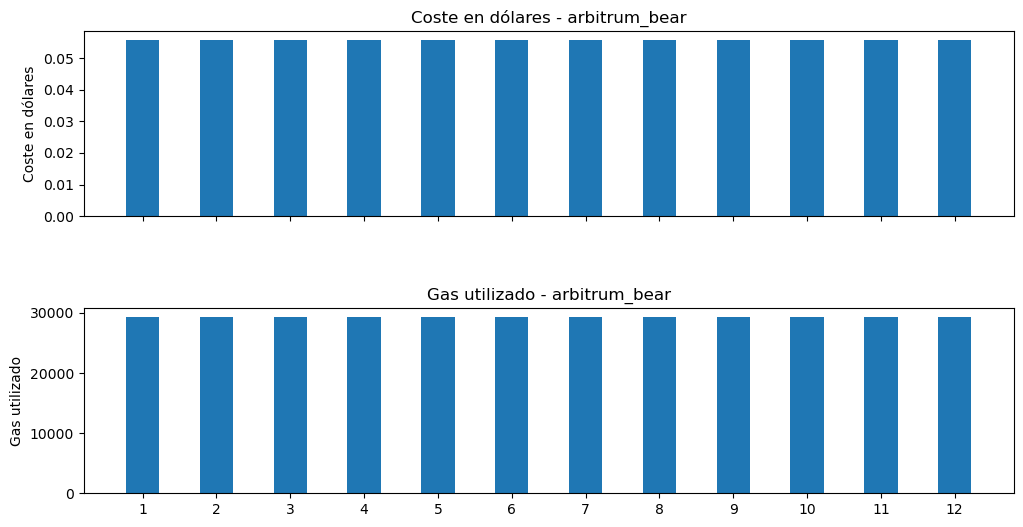

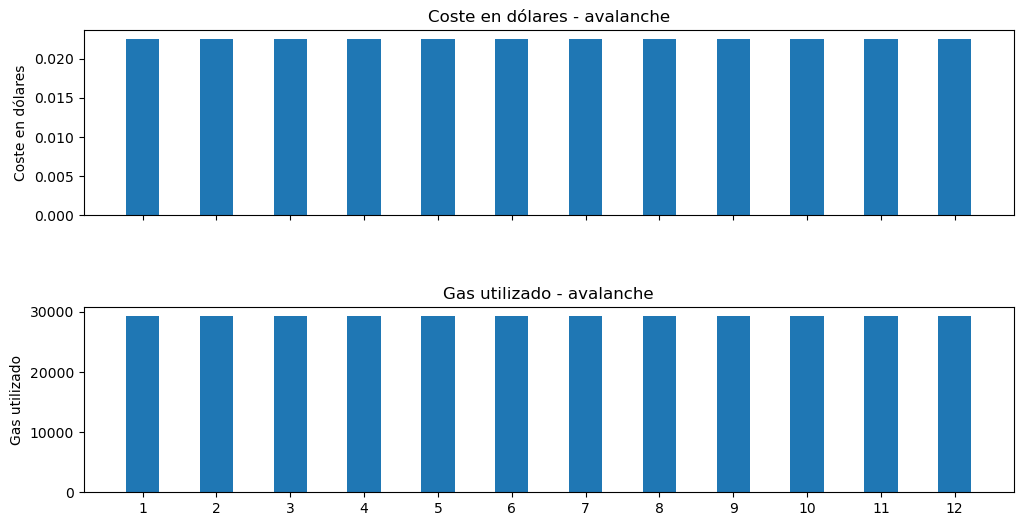

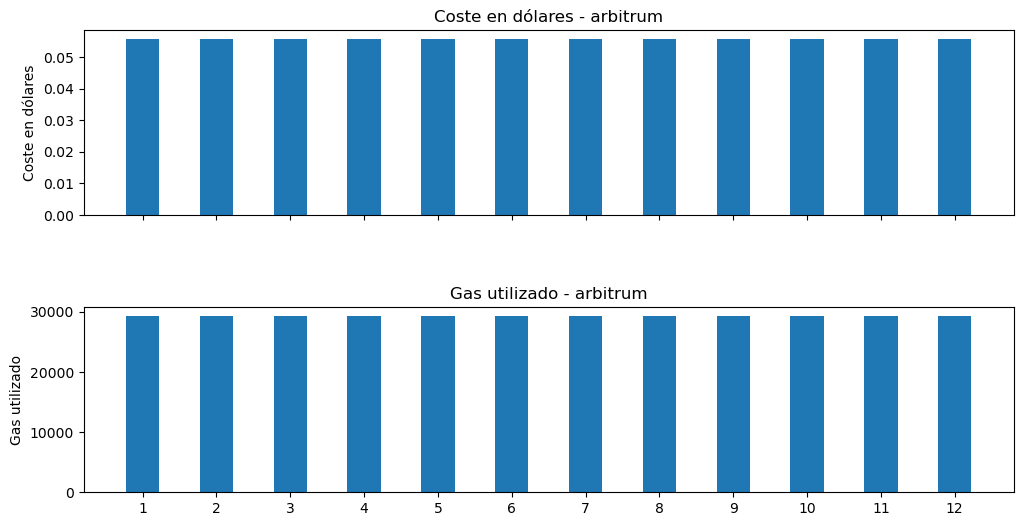

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparativa_compra(dataset_name, dataset):
    # Configuración del gráfico
    labels = [f"{i}" for i in range(1, len(dataset['Coste en dólares'])+1)]
    x = np.arange(len(labels))
    width = 0.45

    # Crear el gráfico con figsize
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)

    # Gráfico para Coste en dólares
    axs[0].bar(x, dataset['Coste en dólares'], width)
    axs[0].set_ylabel('Coste en dólares')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].set_title(f"Coste en dólares - {dataset_name}")

    # Gráfico para Gas utilizado
    axs[1].bar(x, dataset['Gas utilizado'], width)
    axs[1].set_ylabel('Gas utilizado')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].set_title(f"Gas utilizado - {dataset_name}")

    # Mostrar el gráfico
    plt.show()

# Generar la gráfica para cada dataset
for dataset_name, dataset_values in datasets_resumen.items():
    plot_comparativa_compra(dataset_name, dataset_values)


<section id="dispersion-individual">
  <h2>Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque Individualizado</h2>

</section>

En esta representación veremos mediante un diagrama de dispersión como ha sido el gas utilizado y su respectivo coste en ether.

### Forma individual

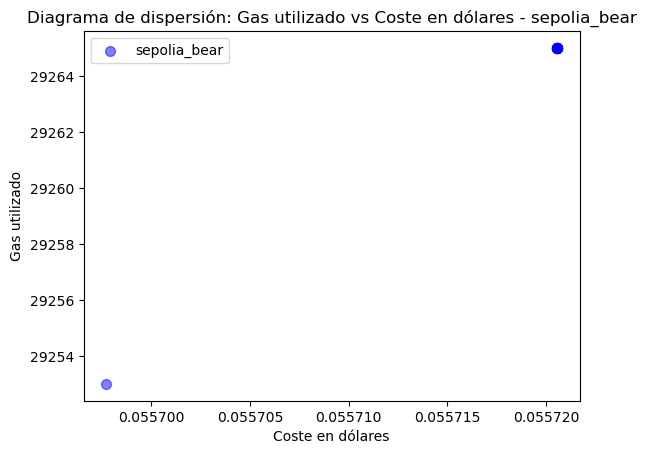

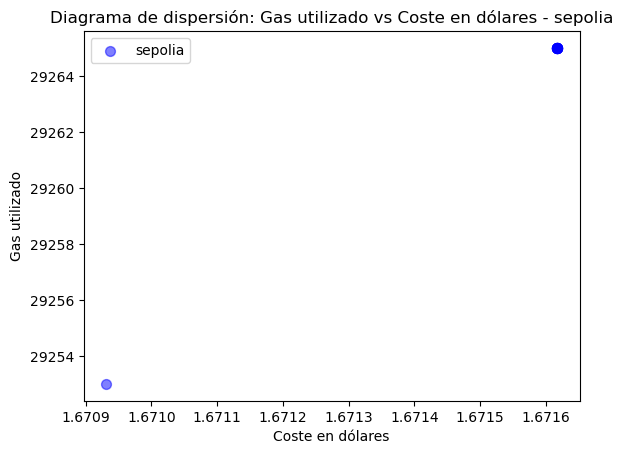

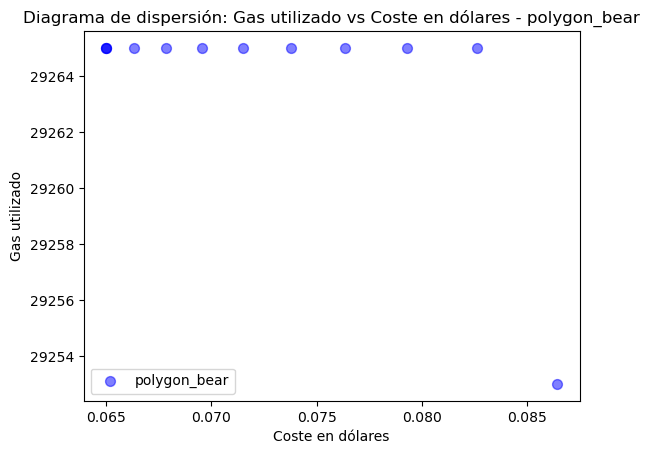

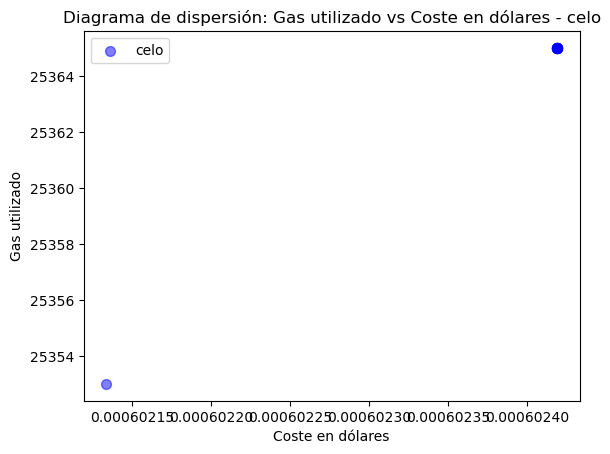

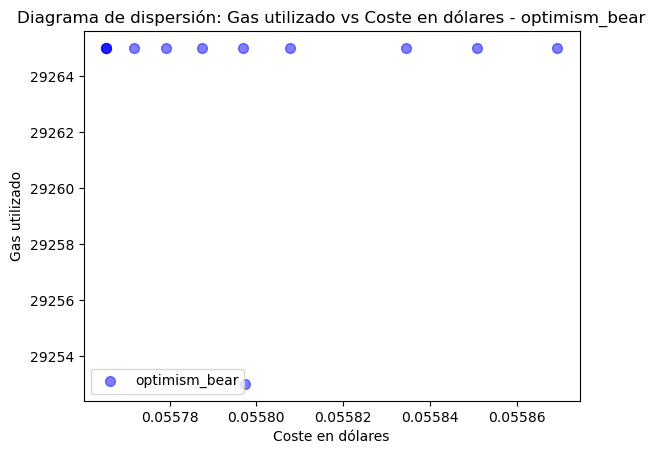

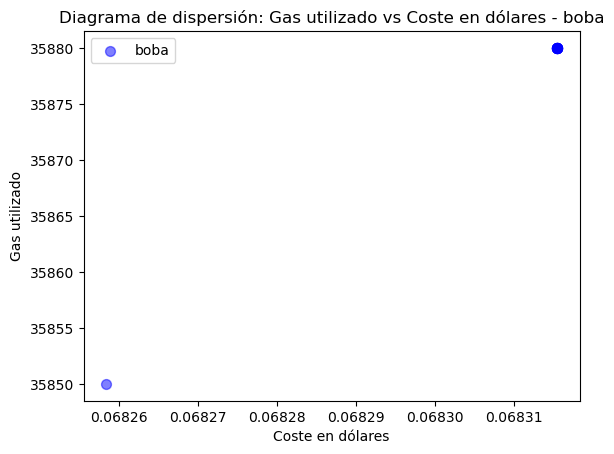

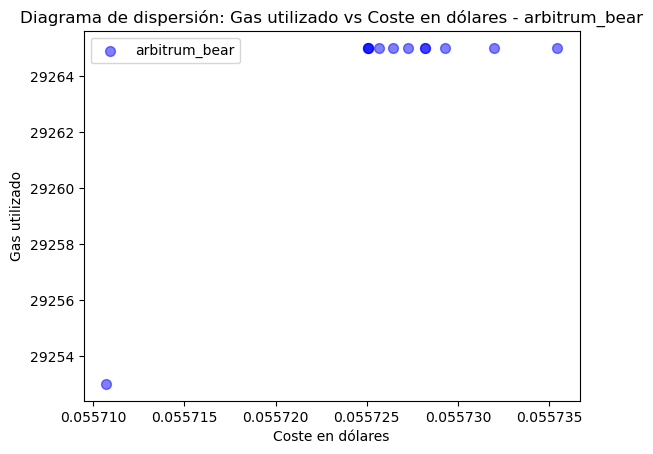

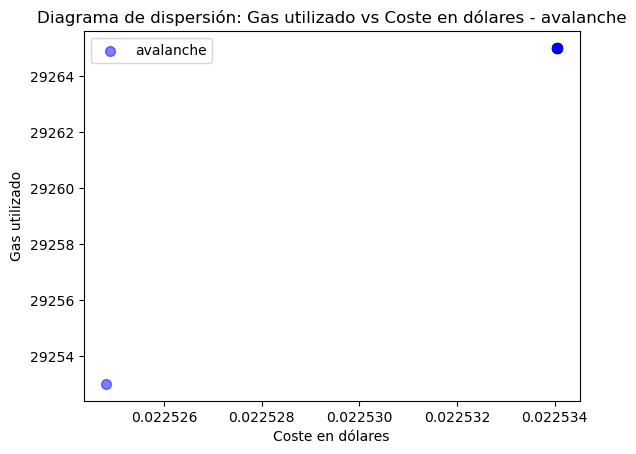

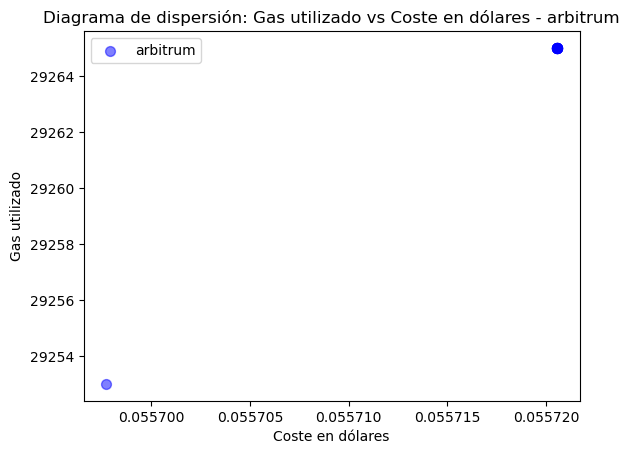

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter(dataset_name, dataset):
    # Configuración del gráfico
    x = dataset['Coste en dólares']
    y = dataset['Gas utilizado']
    size = 50
    colors = 'b'

    # Crear el gráfico de dispersión
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=size, c=colors, alpha=0.5, label=dataset_name)

    # Configurar las etiquetas y leyendas del gráfico
    ax.set_xlabel('Coste en dólares')
    ax.set_ylabel('Gas utilizado')
    ax.legend()

    # Añadir título al gráfico
    plt.title(f"Diagrama de dispersión: Gas utilizado vs Coste en dólares - {dataset_name}")

    # Mostrar el gráfico
    plt.show()

# Generar la gráfica de dispersión para cada dataset
for dataset_name, dataset_values in datasets_resumen.items():
    plot_scatter(dataset_name, dataset_values)



<section id="dispersion-conjunto">
  <h2>Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque en Conjunto</h2>

</section>

En esta representación veremos mediante un diagrama de dispersión como ha sido el gas utilizado y su respectivo coste en ether.

### Conjunto

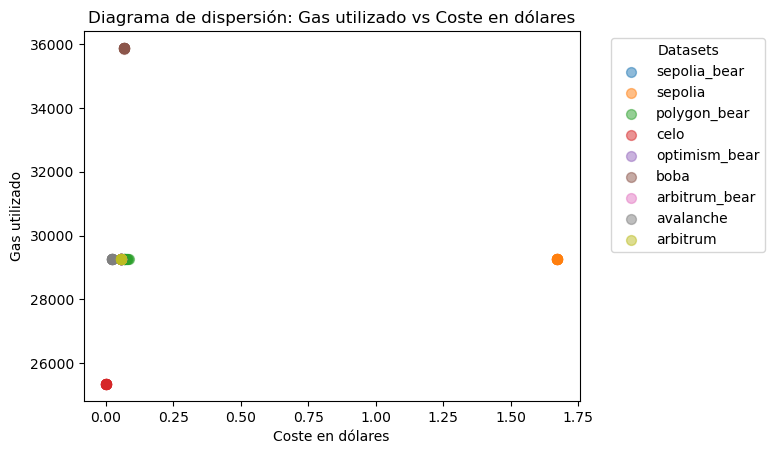

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Configuración del gráfico
fig, ax = plt.subplots()
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    x = dataset_values['Coste en dólares']
    y = dataset_values['Gas utilizado']
    size = 50

    # Crear el gráfico de dispersión
    ax.scatter(x, y, s=size,  alpha=0.5, label=dataset_name)

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Coste en dólares')
ax.set_ylabel('Gas utilizado')
ax.legend(title='Datasets', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir título al gráfico
plt.title("Diagrama de dispersión: Gas utilizado vs Coste en dólares")

# Mostrar el gráfico
plt.show()


In [26]:
# Crear una lista vacía para almacenar los DataFrames
dataframes = []

# Recorrer el diccionario y agregar cada DataFrame a la lista
for dataset_name, dataset_values in datasets_resumen.items():
    dataset_values['Fuente'] = dataset_name
    dataframes.append(dataset_values)

# Concatenar los DataFrames en la lista
datos = pd.concat(dataframes, axis=0, ignore_index=True)

# Contar el número de puntos con las mismas coordenadas y fuente
conteo = datos.groupby(['Diferencia de tiempo', 'Coste en dólares', 'Fuente']).size().reset_index(name='coincidencia')

# Ordenar los resultados por la columna 'coincidencia' de mayor a menor
conteo = conteo.sort_values(by=['coincidencia'], ascending=False)

# Crear una columna que indique la fuente de cada punto
for dataset_name in datasets_resumen:
    conteo['Fuente'] = conteo['Fuente'].apply(lambda x: dataset_name if x == dataset_name else x)

# Mostrar los resultados
display(conteo)


,Diferencia de tiempo,Coste en dólares,Fuente,coincidencia
14,1.000000,0.055721,sepolia_bear,11
6,0.000000,0.068316,boba,11
8,0.000000,1.671617,sepolia,11
2,0.000000,0.000602,celo,9
44,2.000000,0.022534,avalanche,6
4,0.000000,0.055721,arbitrum,5
13,1.000000,0.055721,arbitrum,5
23,1.000000,0.055765,optimism_bear,3
46,4.000000,0.022534,avalanche,3
15,1.000000,0.055725,arbitrum_bear,3


## BoxPlot

<section id="boxplot-gas">
  <h2>Representación mediante BoxPlot del Gas utilizado</h2>

</section>

El Boxplot nos permite visualizar la distribución de un conjunto de datos. El boxplot muestra la mediana (línea dentro de la caja), el rango intercuartil (la caja que va desde el primer cuartil al tercer cuartil), los valores mínimo y máximo (los bigotes), y los posibles valores atípicos o extremos (los puntos fuera de los bigotes)

<section id="boxplot-coste">
  <h2>Representación mediante BoxPlot del Coste en dólares</h2>

</section>


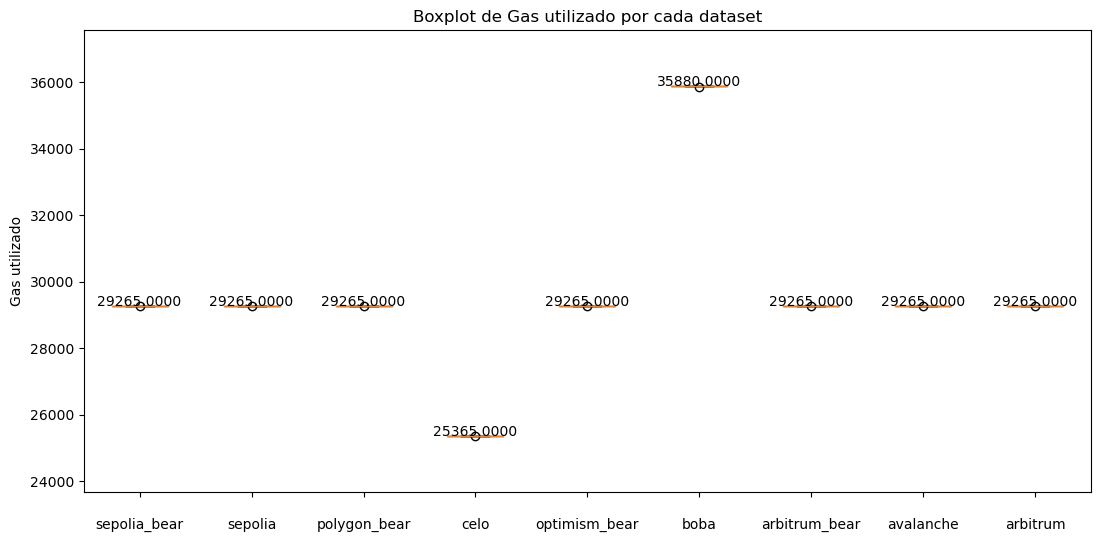

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
data = []
labels = []
colors = []

for dataset_name, dataset_values in datasets_resumen.items():
    data.append(dataset_values['Gas utilizado'])
    labels.append(dataset_name)
    colors.append(np.random.rand(3,))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(13, 6))

# Cambiar el color de cada boxplot y guardar las cajas en una lista
boxes = ax.boxplot(data, labels=labels, patch_artist=True, whiskerprops=dict(linestyle='-', linewidth=1.5))
for box, color in zip(boxes['boxes'], colors):
    box.set_facecolor(color)

# Obtener la mediana de cada set de datos y mostrarla en el gráfico
for i, median in enumerate(boxes['medians']):
    median_val = np.median(data[i])
    ax.text(i + 1, median_val, f"{median_val:.4f}", horizontalalignment='center', fontsize=10)

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Gas utilizado')
ax.set_title('Boxplot de Gas utilizado por cada dataset')
plt.xticks(range(1, len(labels) + 1), labels)
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar los límites del eje y
ymin, ymax = ax.get_ylim()
margin = (ymax - ymin) * 0.1
ax.set_ylim(ymin - margin, ymax + margin)

# Mostrar el gráfico
plt.show()


<section id="boxplot-coste">
  <h2>Representación mediante BoxPlot del Coste en dólares</h2>

</section>


Se va a observar una representación de coste en ether y a continuación se va a poder apreciar una lista con el valor de la mediana para cada box

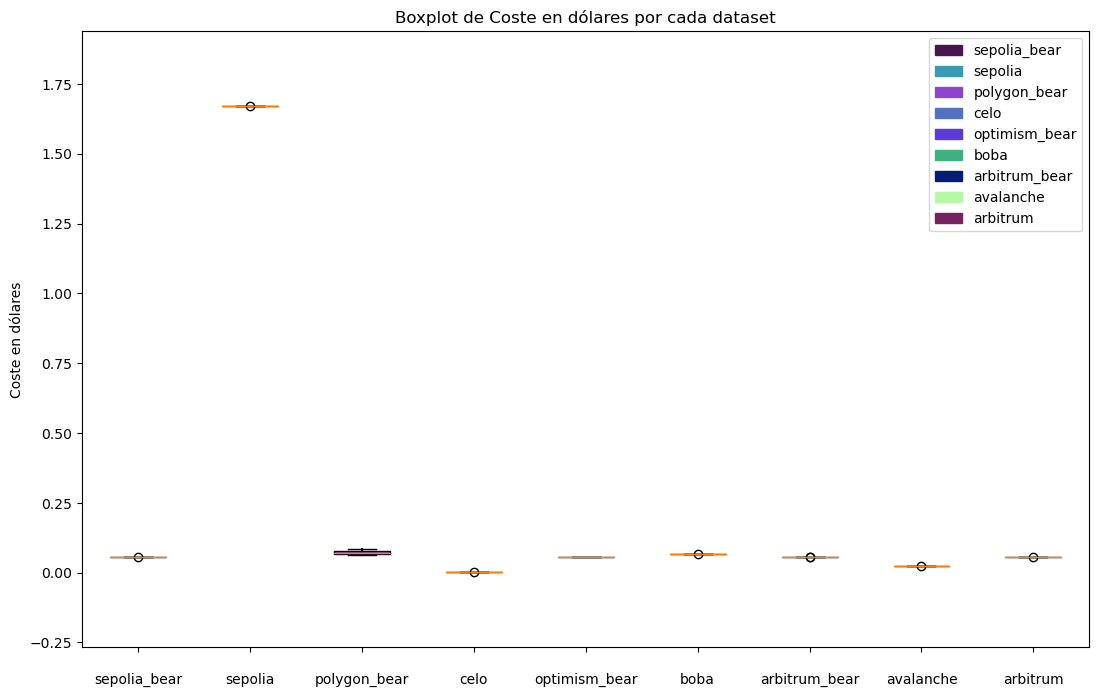

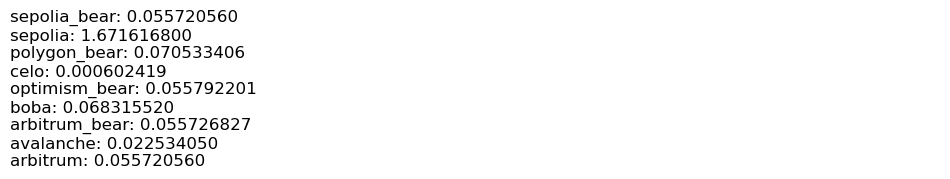

In [28]:
import numpy as np
import matplotlib.pyplot as plt

data = []
labels = []
colors = []

for dataset_name, dataset_values in datasets_resumen.items():
    data.append(dataset_values['Coste en dólares'])
    labels.append(dataset_name)
    colors.append(np.random.rand(3,))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(13, 8))

# Cambiar el color de cada boxplot y guardar las cajas en una lista
boxes = ax.boxplot(data, labels=labels, patch_artist=True, whiskerprops=dict(linestyle='-', linewidth=1.5))
for box, color in zip(boxes['boxes'], colors):
    box.set(facecolor=color)

# Obtener la mediana de cada set de datos y mostrarla debajo de la grafica
medians = [np.median(d) for d in data]
median_labels = [f"{dataset_name}: {median:.9f}" for dataset_name, median in zip(labels, medians)]

# Agregar leyenda con rectángulos de colores
rects = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(rects, labels, loc='upper right')

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Coste en dólares')
ax.set_title('Boxplot de Coste en dólares por cada dataset')
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar los límites del eje y
ymin, ymax = ax.get_ylim()
margin = (ymax - ymin) * 0.1
ax.set_ylim(ymin - margin, ymax + margin)

# Mostrar el gráfico
plt.show()

# Mostrar texto con la mediana debajo de la gráfica
fig, ax = plt.subplots(figsize=(12, 1))
ax.axis('off')
ax.text(0, 0, '\n'.join(median_labels), ha='left', va='center', fontsize=12)
plt.show()


#  Dataset resumen


<section id="resumen">
  <h2>Resumen</h2>

</section>

Importamos los datastes de datos y creamos un diccionario llamado datasets_resumen2 que contiene los datos anteriormente importandos

In [29]:
import pandas as pd
import os

# Obtener la lista de carpetas en la carpeta datos/paralelo/
carpetas = [f for f in os.listdir('datos/paralelo/') if os.path.isdir(os.path.join('datos/paralelo/', f))]

# Crear un diccionario vacío para almacenar los DataFrames
datasets_resumen2 = {}

# Leer cada archivo CSV en cada carpeta y asignarlo a una variable con el nombre de la carpeta
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/paralelo/', carpeta)) if f.endswith('_paralelo_resumen2.csv')]
    for f in csv_files:
        name = os.path.splitext(f)[0]
        name_without_suffix = name.replace('_paralelo_resumen2', '')
        vars()[name] = pd.read_csv(os.path.join('datos/paralelo/', carpeta, f))
        datasets_resumen2[name_without_suffix] = eval(name)

# Imprimir los nombres de las variables creadas que contengan "_paralelodatos2"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_resumen2.keys()):
    print(var)

Los siguientes DataFrames se han creado:
arbitrum
arbitrum_bear
avalanche
boba
celo
optimism_bear
polygon_bear
sepolia
sepolia_bear


## Procesamos los datos

<section id="modificacion-coste-total">
  <h2>Modificación de la columna Coste Total</h2>

</section>


Se procede a modificar la columna de Coste Total, haciendo que sea el valor de la última posición de la columna coste total de los datasets que hemos estado representando hasta ahpra

In [30]:
datasets_resumen2

{'sepolia_bear':    Antes  Despues  Duración  Transacciones  Coste Total
 0  10634    20937     10303             12     0.000351,
 'sepolia':    Antes  Despues  Duración  Transacciones  Coste Total
 0    399    38059     37660             12     0.000351,
 'polygon_bear':    Antes  Despues  Duración  Transacciones  Coste Total
 0  10789    23151     12362             12     0.000456,
 'celo':    Antes  Despues  Duración  Transacciones  Coste Total
 0  11281    21442     10161             12     0.007609,
 'optimism_bear':    Antes  Despues  Duración  Transacciones  Coste Total
 0  10070    19215      9145             12     0.000352,
 'boba':    Antes  Despues  Duración  Transacciones  Coste Total
 0   8458    14775      6317             12     0.000431,
 'arbitrum_bear':    Antes  Despues  Duración  Transacciones  Coste Total
 0   9982    29379     19397             12     0.000351,
 'avalanche':    Antes  Despues  Duración  Transacciones  Coste Total
 0  29446    58211     28765    

In [31]:
datasets_resumen

{'sepolia_bear':                                           Transacción  Estado  Gas utilizado  \
 0   0x1928324fcb4ff249288da3a98972993df8c820e2c96f...    True          29265   
 1   0x522a731a9e5a2ab72ae5d506f4b53e7dff138d668be9...    True          29253   
 2   0xa26c11d5c1c2a0ffa5c2058ae964733ff39b95494b81...    True          29265   
 3   0xf1b0a3d7158080922aa799c8c4f74a6f6e12e797765c...    True          29265   
 4   0x99655dd4fb85f195de33166f38af71b2b8ea96545d1b...    True          29265   
 5   0x999dae00da1eb85f63307e81cc30f531d1d94e73e7c6...    True          29265   
 6   0xced39736060d0886b5d48e2d81223014fe594fdb7ced...    True          29265   
 7   0xa681e482690fb2d15cd6fa3c8c78d674f5a7fcb71ee1...    True          29265   
 8   0xe2a73cf7276d4b560c6c4acf4e1375231ba5dea7563e...    True          29265   
 9   0xf4811c5ed9546336a2848369c502846384c209b39461...    True          29265   
 10  0x2c34aeea8f5425752c39c3d5a1b738fc798426d460c8...    True          29265   
 11  0x6025e

Actualizamos el valor de CosteTotal con la suma de la columan de Coste Total de los dataframes que hemos estado representando anteriormente.

In [32]:
for dataset_name, dataset_values in datasets_resumen2.items():
    # Verificar si la clave existe en el diccionario "datasets_resumen"
    if dataset_name in datasets_resumen:
        # Obtener el último valor de la columna "Coste Total" del DataFrame correspondiente en "datasets_resumen"
        last_coste_total = datasets_resumen[dataset_name]['Coste total'].iloc[-1]
        
        # Reemplazar el valor de la columna "Coste Total" del DataFrame correspondiente en "datasets_resumen2"
        datasets_resumen2[dataset_name]['Coste Total'] = last_coste_total
    
    # Imprimir el nombre del conjunto de datos y el valor actual de la columna "Coste Total" del DataFrame en "datasets_resumen2"
    print("Conjunto de datos:", dataset_name)
    print("Valor actual de la columna 'Coste Total' en datasets_resumen2:")
    print(dataset_values['Coste Total'])


Conjunto de datos: sepolia_bear
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.000351
Name: Coste Total, dtype: float64
Conjunto de datos: sepolia
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.010535
Name: Coste Total, dtype: float64
Conjunto de datos: polygon_bear
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.000456
Name: Coste Total, dtype: float64
Conjunto de datos: celo
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.007609
Name: Coste Total, dtype: float64
Conjunto de datos: optimism_bear
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.000352
Name: Coste Total, dtype: float64
Conjunto de datos: boba
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.000431
Name: Coste Total, dtype: float64
Conjunto de datos: arbitrum_bear
Valor actual de la columna 'Coste Total' en datasets_resumen2:
0    0.000351
Name: Coste Total, dtype: float64
Conjunto de datos:

#### Creamos una lista con el nombre de los datasets

In [33]:
import os

# Obtener la lista de carpetas en la carpeta datos/secuencial/
carpetas = [f for f in os.listdir('datos/paralelo/') if os.path.isdir(os.path.join('datos/paralelo/', f))]

# Crear una lista para almacenar los nombres de los datasets
datasets = []

# Leer cada archivo CSV en cada carpeta y agregarlo a la lista datasets si termina en "_datos.csv"
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/paralelo/', carpeta)) if f.endswith('_paralelo_resumen2.csv')]
    for f in csv_files:
        datasets.append(os.path.splitext(f)[0])

# Imprimir los nombres de los datasets creados
print("Los siguientes datasets se han creado:")
for dataset in datasets:
    print(dataset)

Los siguientes datasets se han creado:
sepolia_bear_paralelo_resumen2
sepolia_paralelo_resumen2
polygon_bear_paralelo_resumen2
celo_paralelo_resumen2
optimism_bear_paralelo_resumen2
boba_paralelo_resumen2
arbitrum_bear_paralelo_resumen2
avalanche_paralelo_resumen2
arbitrum_paralelo_resumen2




<section id="columnas-dolares2">
  <h2>Añadir columna Coste en dólares y Coste en dólares total</h2>

</section>

Llevamos a cabo una conversión del precio del ether de cada criptomoneda a su equivalente en dólares estadounidenses en el instante en el que se recolectaron los datos

In [34]:
import pandas as pd

# Definir las constantes de conversión de cada conjunto de datos
conversion_constants = {
    "ether": 1904,
    "celo": 0.95,
    "avax": 22
}

# Definir la función para convertir a dólares
def wei_to_usd(datos, constant):
    # Agregar la nueva columna "Coste en dólares"
    datos["Coste en dólares total"] = datos["Coste Total"] * constant
    
    # Devolver el DataFrame modificado
    return datos

# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Obtener la constante correspondiente al conjunto de datos actual
    if "celo" in dataset:
        constant = conversion_constants['celo']
    elif "avalanche" in dataset:
        constant = conversion_constants['avax']
    else:
        constant = conversion_constants['ether']
    
    # Aplicar la función de conversión a dólares a la columna "Coste en dólares"
    globals()[dataset] = wei_to_usd(globals()[dataset], constant)
    
    # Imprimir el DataFrame resultante
    print(globals()[dataset].head())


   Antes  Despues  Duración  Transacciones  Coste Total  \
0  10634    20937     10303             12     0.000351   

   Coste en dólares total  
0                0.668624  
   Antes  Despues  Duración  Transacciones  Coste Total  \
0    399    38059     37660             12     0.010535   

   Coste en dólares total  
0               20.058716  
   Antes  Despues  Duración  Transacciones  Coste Total  \
0  10789    23151     12362             12     0.000456   

   Coste en dólares total  
0                 0.86866  
   Antes  Despues  Duración  Transacciones  Coste Total  \
0  11281    21442     10161             12     0.007609   

   Coste en dólares total  
0                0.007229  
   Antes  Despues  Duración  Transacciones  Coste Total  \
0  10070    19215      9145             12     0.000352   

   Coste en dólares total  
0                0.669591  
   Antes  Despues  Duración  Transacciones  Coste Total  \
0   8458    14775      6317             12     0.000431   

   Cos

## Representación

<section id="representacion-coste-total">
  <h2>Representación de Coste Total</h2>

</section>


Representamos de forma gráfica el valor en ether del coste total en dólares que ha costado realizar estas operaciones

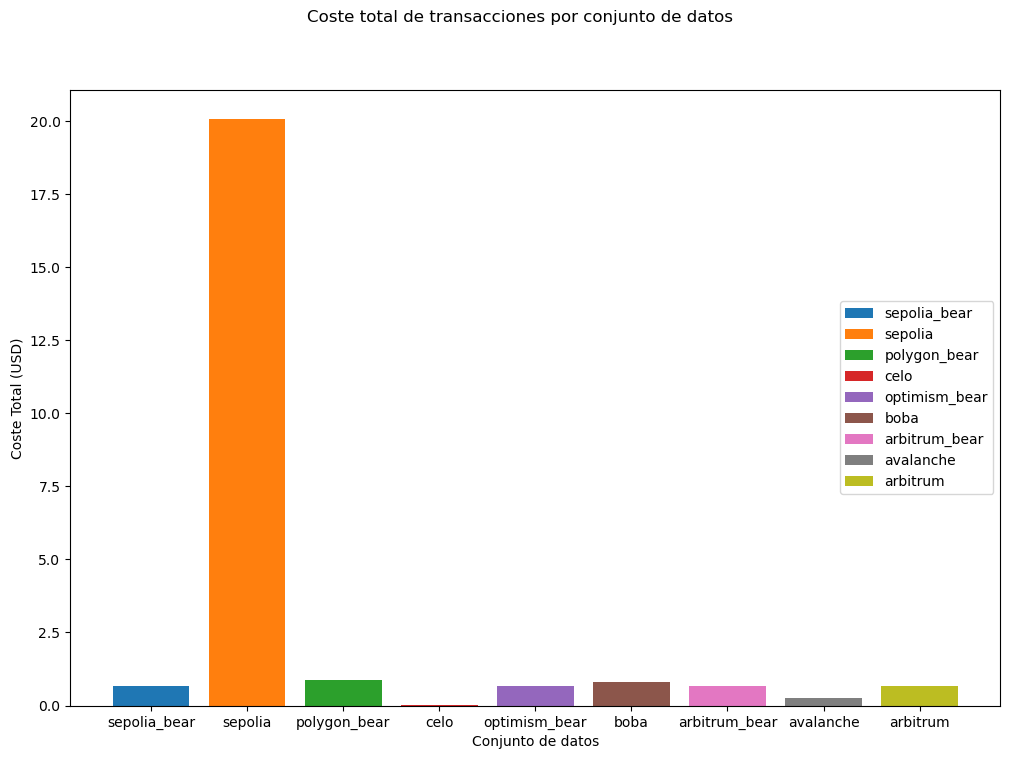

In [35]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de barras para cada conjunto de datos en datasets_resumen
for dataset_name, dataset_values in datasets_resumen2.items():
    y = dataset_values['Coste en dólares total']
    ax.bar(dataset_name, y, label=dataset_name)
    
# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Conjunto de datos')
ax.set_ylabel('Coste Total (USD)')
ax.legend(loc='right')
fig.suptitle('Coste total de transacciones por conjunto de datos')

plt.show()



<section id="representacion-coste-duracion">
  <h2>Representación de Coste Total y la duración</h2>

</section>

Para finalizar, representamos la duración y el coste total en dólares de los datos

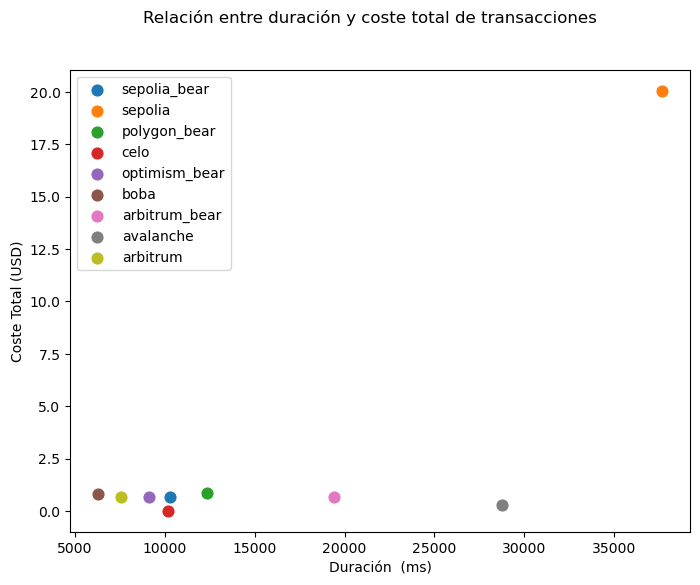

In [36]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de dispersión para cada conjunto de datos en datasets_resumen
for dataset_name, dataset_values in datasets_resumen2.items():
    x = dataset_values['Duración']
    y = dataset_values['Coste en dólares total']
    ax.scatter(x, y, s=60, label=dataset_name)
    
# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Duración  (ms)')
ax.set_ylabel('Coste Total (USD)')
ax.legend()
fig.suptitle('Relación entre duración y coste total de transacciones')
plt.show()
